# Global distribution of total ice water path 

In [52]:
from pathlib import Path 
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import datetime
import pandas as pd 
import cartopy.crs as ccrs
import cmocean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
mpl.style.use("ccic.mplstyle")

In [44]:
# read in all datasets 
data_path = Path('/scratch/ccic_record/data/') 

#ERA5 
era5_global= xr.open_dataarray(data_path / 'ERA5'/ 'era5_tiwp_global_distribution.nc')

# MODIS 
modis = xr.open_dataset(data_path / 'modis' /  'global_distribution_cf_tiwp_modis.nc')
modis_global = modis.TIWP_global_distribution_unmasked / 1000

# ISCCP
isccp = xr.open_dataset(data_path / 'processed'/  'isccp_tiwp_ca.nc')
isccp_global = isccp.tiwp


# CCIC GridSat 
ccic = xr.open_dataset(data_path / 'processed' /  'ccic_gridsat.nc')
# get CCIC coordinates 
ds = xr.open_dataset('/scratch/ccic_record/data/ccic/gridsat/ccic_gridsat_199911_monthlymean.nc') 
# assign coordinates --
coords = {'latitude': ds.latitude.values, 'longitude': ds.longitude.values}
ccic = ccic.assign_coords(coords)
ccic_global = ccic.tiwp

# CCIC CPCIR 
ccic_cpcir = xr.open_dataset(data_path / 'processed' / 'ccic_cpcir_global_mean.nc' )
ccic_cpcir_global = ccic_cpcir.tiwp

# PATMOS
patmosx = xr.open_dataset(data_path / 'processed'/ 'PATMOS-x_timeseries198108-201912_notebook_results.nc')
patmosx_global = patmosx.tiwp_fullaverage / 1000


# 2C-ICE 


# DARDAR

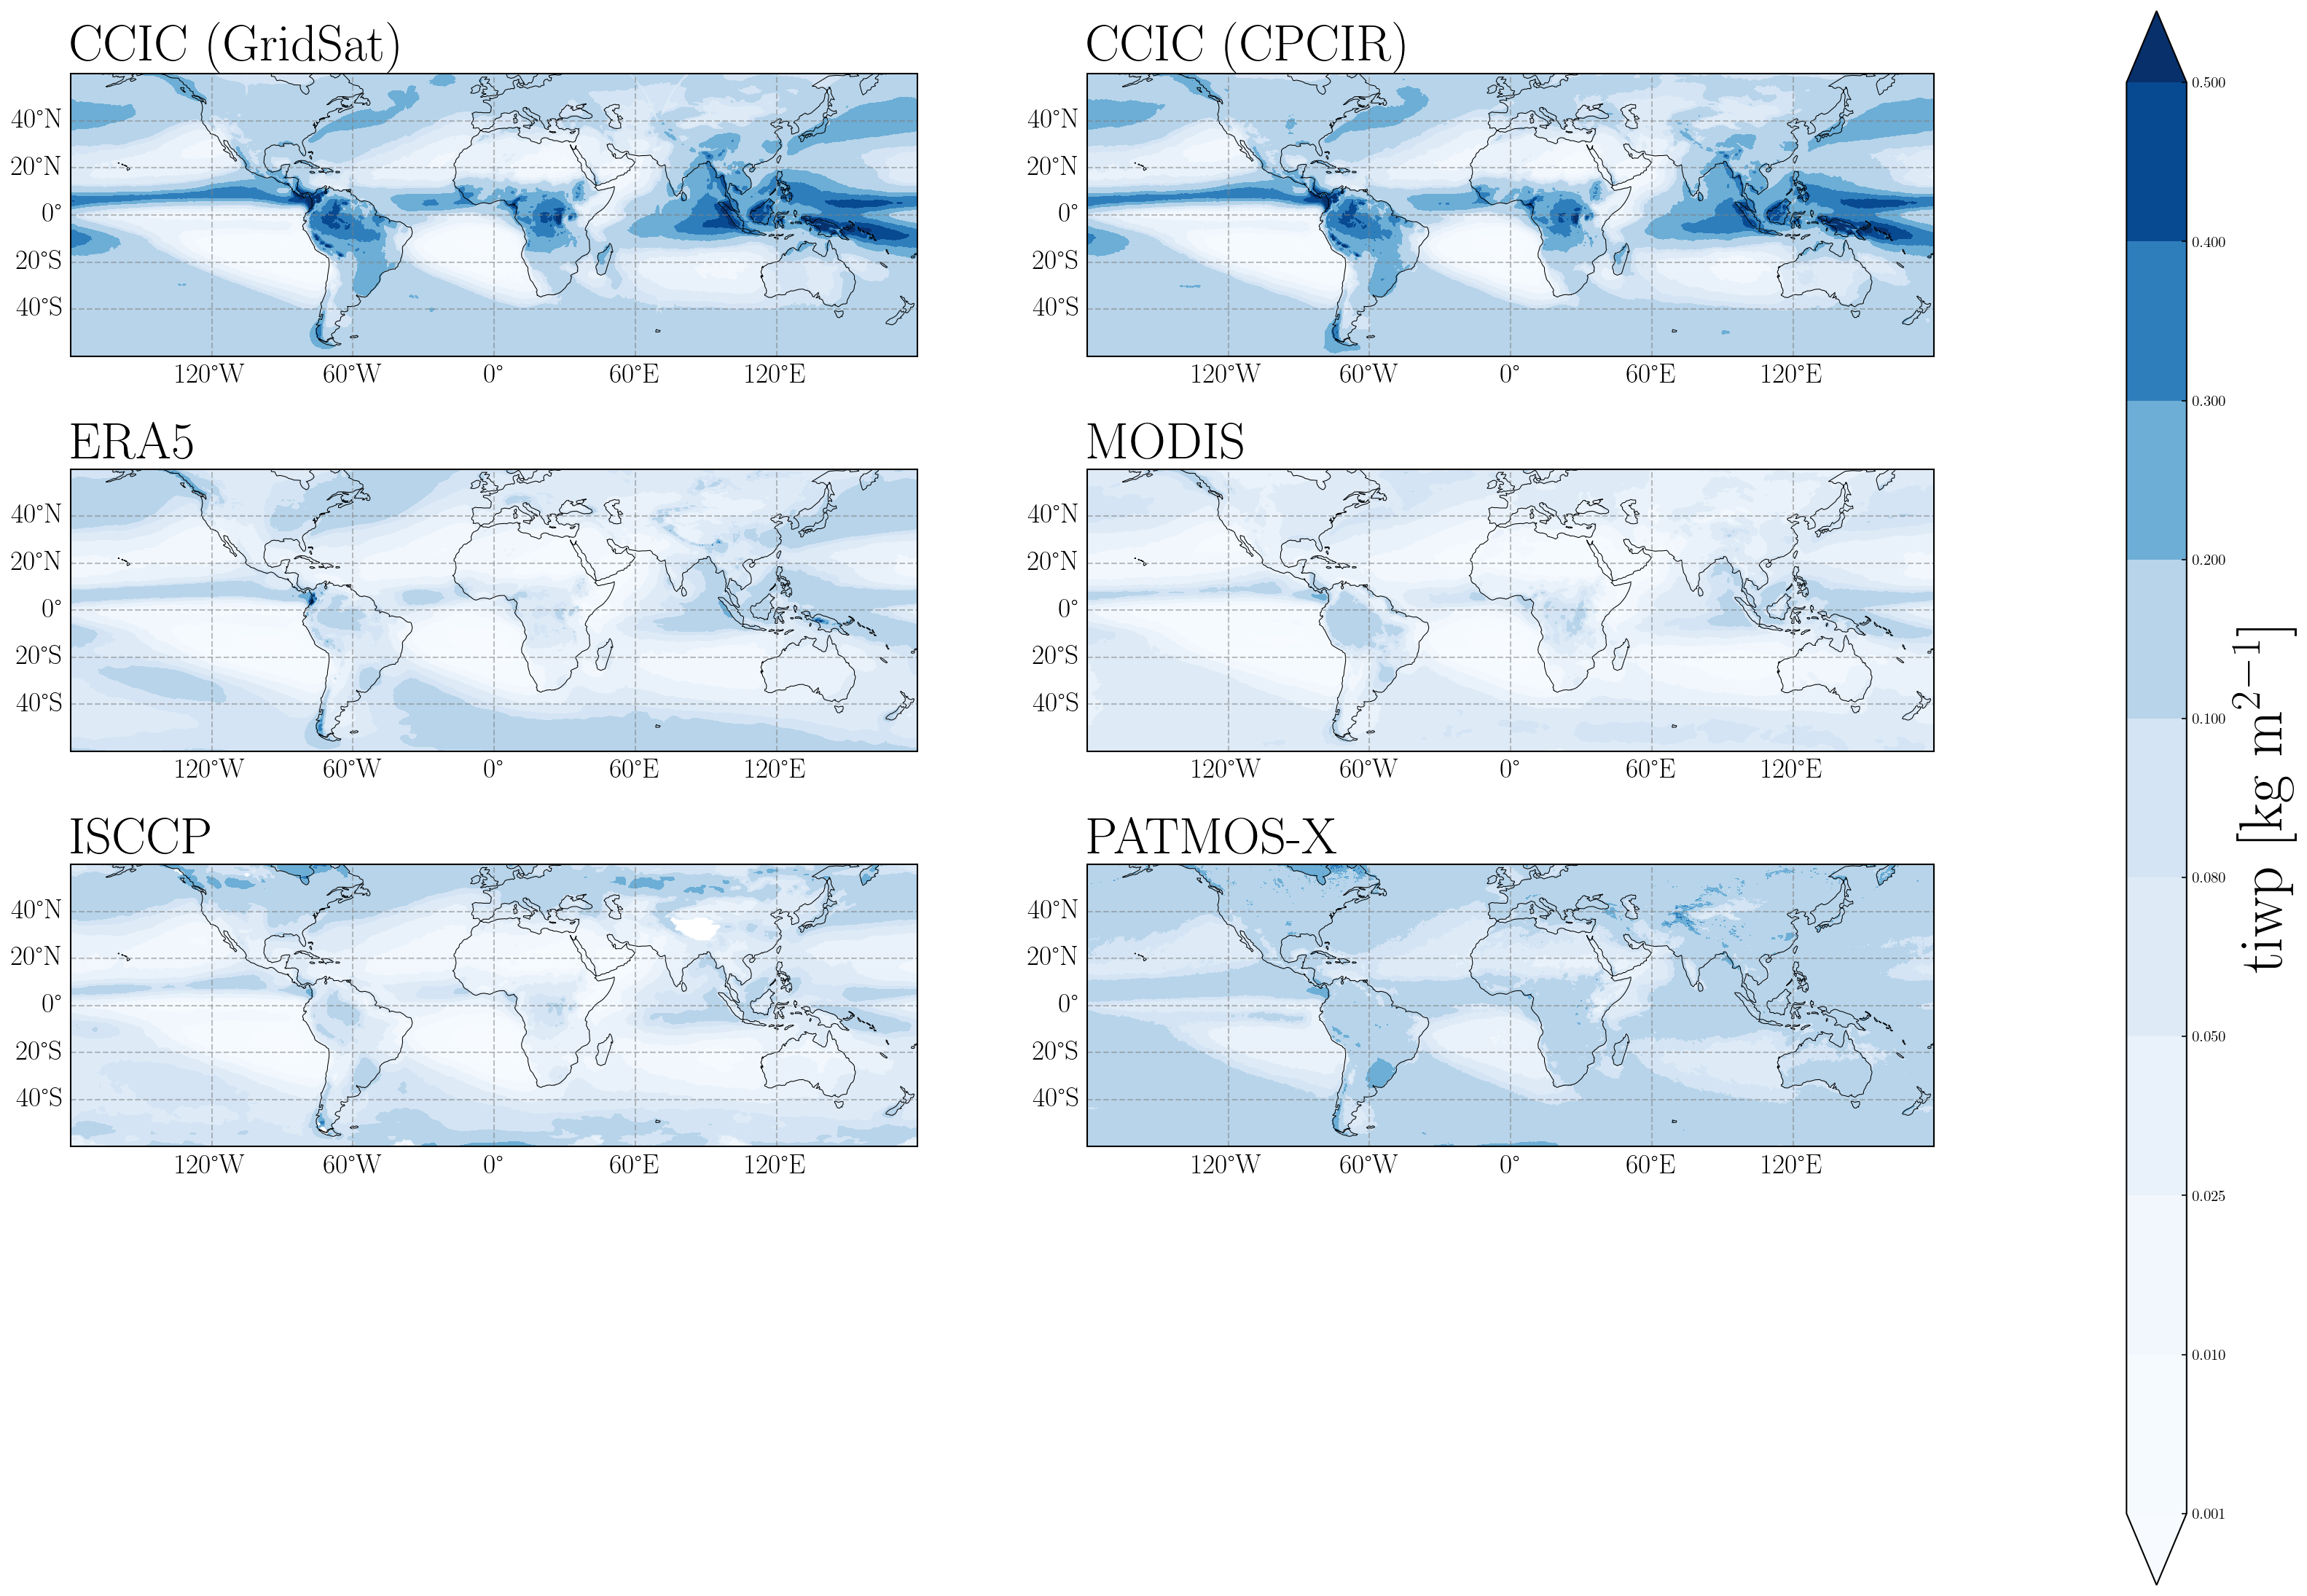

In [68]:
# Define the figure and each axis for the 3 rows and 2 columns 
nrows = 4 
ncols = 2 
fs = 34

datasets = [ccic_global, ccic_cpcir_global, era5_global, modis_global, isccp_global, patmosx_global]
names = ['CCIC (GridSat)', 'CCIC (CPCIR)', 'ERA5', 'MODIS', 'ISCCP', 'PATMOS-X'] 

fig = plt.figure( figsize = (22, 18)) 

ax1 = plt.subplot2grid(shape=(nrows, ncols), loc=(0, 0), colspan=1, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid(shape=(nrows, ncols), loc=(0, 1), colspan=1, projection=ccrs.PlateCarree())
ax3 = plt.subplot2grid(shape=(nrows, ncols), loc=(1, 0), colspan=1, projection=ccrs.PlateCarree())
ax4  = plt.subplot2grid(shape= (nrows, ncols), loc=(1, 1), colspan=1, projection=ccrs.PlateCarree())
ax5  = plt.subplot2grid(shape= (nrows, ncols), loc=(2, 0), colspan=1, projection= ccrs.PlateCarree())
ax6  = plt.subplot2grid(shape= (nrows, ncols), loc=(2, 1), colspan=1, projection= ccrs.PlateCarree())
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

#Loop over all of the models
for i,dataset in enumerate(datasets):

    # get coordinates 
    if names[i] == 'MODIS':
        lons = dataset.lon.data
        lats = np.flip(dataset.lat.data, axis = 0) 
    else: 
        lons = dataset.longitude
        lats = dataset.latitude

    # Set extent 
    axs[i].set_extent([-180, 180, -60, 60])
    # Contour plot
    cs=axs[i].contourf(lons, lats, dataset,
                      levels = [0.001, 0.01, 0.025, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5],
                      cmap=plt.cm.Blues,extend='both')

    # Title each subplot with the name of the model
    axs[i].set_title(names[i], fontsize = fs)

    # Draw the coastines for each subplot
    axs[i].coastlines(resolution='110m')
    
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='gray',alpha=0.5,linestyle='--') 
    gl.top_labels = False
    gl.right_labels = False 
    gl.xlabel_style = {'size': 18, 'color': 'k'}
    gl.ylabel_style = {'color': 'k', 'size': 18 }
    #plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]') 

cbar_ax = fig.add_axes([0.98, 0.1, 0.025, 0.8])
fig.colorbar(cs, cax=cbar_ax).set_label(label = 'tiwp [kg m$^2$$^{-1}$]', size = 40 ) 



#plt.tight_layout()
plt.savefig(data_path / 'plots' / 'tiwp_spatial_maps.png', bbox_inches = 'tight')
plt.show()




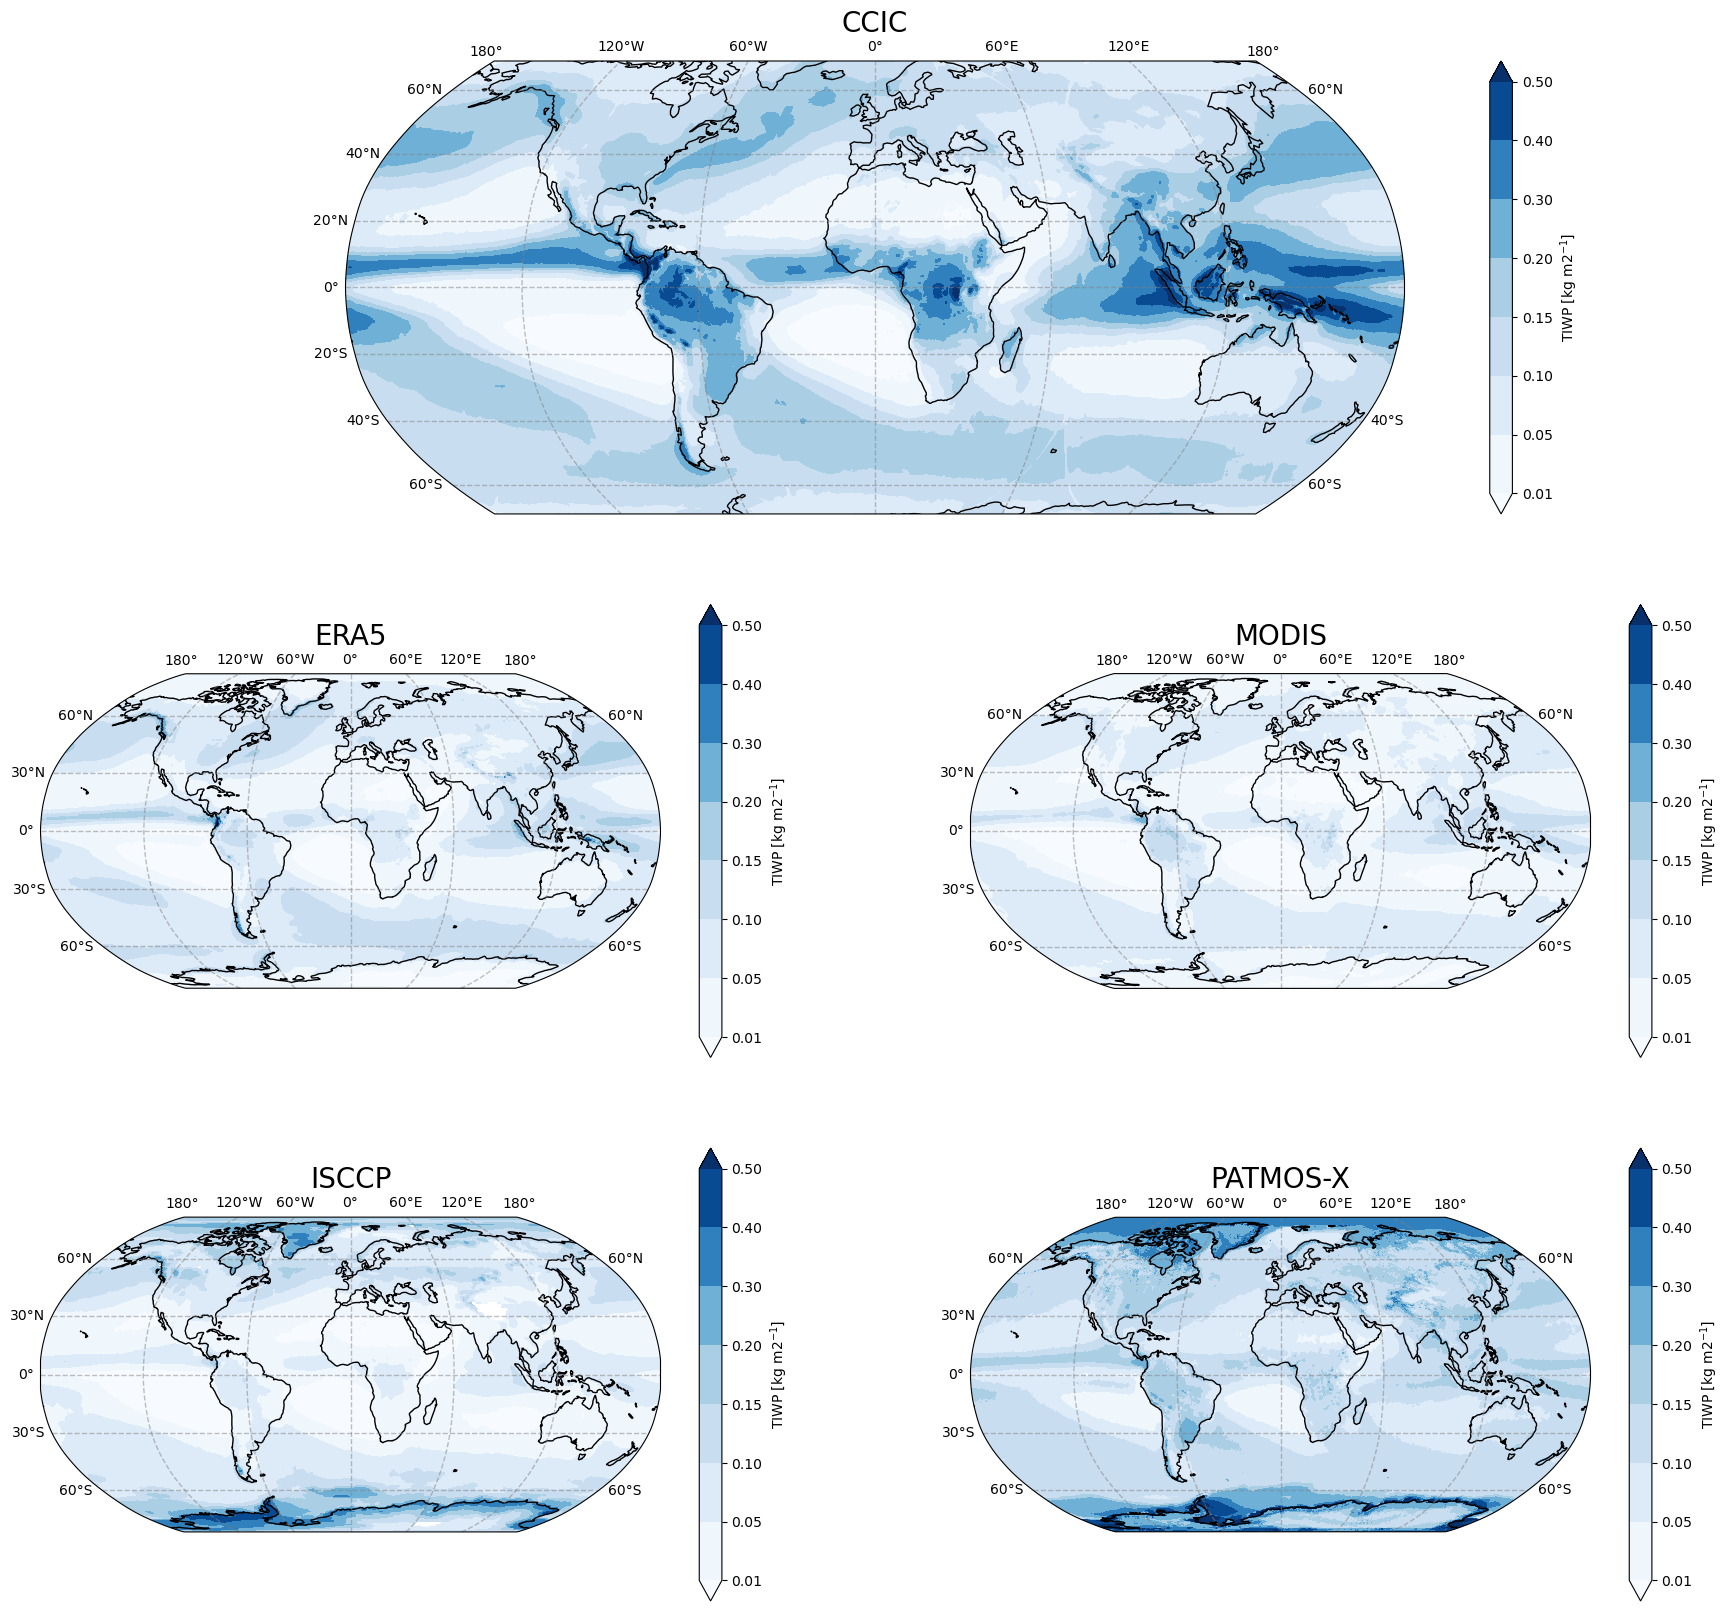

In [64]:
# Define the figure and each axis for the 3 rows and 2 columns 
nrows = 3 
ncols = 2 
fs = 20 
datasets = [ccic_global, era5_global, modis_global, isccp_global, patmosx_global]
names = ['CCIC', 'ERA5', 'MODIS', 'ISCCP', 'PATMOS-X']

#fig, axs = plt.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': ccrs.Robinson()},)
fig = plt.figure(figsize=(22,20))

#gs = GridSpec(nrows, ncols, figure=fig)

ax1 = plt.subplot2grid(shape=(nrows, ncols), loc=(0, 0), colspan=2, projection=ccrs.Robinson())
ax2 = plt.subplot2grid(shape=(nrows, ncols), loc=(1, 0), colspan=1, projection=ccrs.Robinson())
ax3  = plt.subplot2grid(shape= (nrows, ncols), loc=(1, 1), colspan=1, projection=ccrs.Robinson() )
ax4  = plt.subplot2grid(shape= (nrows, ncols), loc=(2, 0), colspan=1, projection= ccrs.Robinson() )
ax5  = plt.subplot2grid(shape= (nrows, ncols), loc=(2, 1), colspan=1, projection= ccrs.Robinson() )
axs = [ax1, ax2, ax3, ax4, ax5]

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
#axs=axs.flatten()

#Loop over all of the models
for i,dataset in enumerate(datasets):
    if names[i] == 'MODIS':
        lons = dataset.lon.data
        lats = np.flip(dataset.lat.data, axis = 0) 
    else: 
        # get coordinates
        lons = dataset.longitude
        lats = dataset.latitude
    # Contour plot
    cs=axs[i].contourf(lons, lats, dataset,
                      transform = ccrs.PlateCarree(),
                      levels = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
                      cmap=plt.cm.Blues,extend='both')

    # Title each subplot with the name of the model
    axs[i].set_title(names[i], fontsize = fs)

    # Draw the coastines for each subplot
    axs[i].coastlines(resolution='110m')
    
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(),
              draw_labels=True,
              linewidth=1,
              color='gray',
              alpha=0.5,
              linestyle='--') 
    gl.bottom_labels = False
    gl.right_labels = False 
    plt.colorbar(cs, label = 'TIWP [kg m2$^{-1}$]') 


plt.savefig(data_path / 'plots' / 'tiwp_global_distribution.png', bbox_inches = 'tight')
plt.show()